In [ ]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import json

In [ ]:
# reading the JSON data using json.load()
file = 'rankings.json'
with open(file) as rankings:
    rank_dict = json.load(rankings)



{'song_data': {'46c7471d-a036-42b3-8db6-9f3e59191879': {'song_name': 'Chihiro', 'artist': 'Billie Eilish', 'album': 'HIT ME HARD AND SOFT', 'album_cover': 'https://lastfm.freetls.fastly.net/i/u/300x300/e69971625c379772fb79213dccfa194f.jpg', 'tags': [['alt-pop', '100'], ['peter', '80'], ['psychedelic pop', '60'], ['deep house', '60'], ['2024', '60']], 'duration_s': 303.0, 'total_plays': 20303728}, '9bf8acfa-edc3-42f4-9030-f6cf3ec41486': {'song_name': 'Not Like Us', 'artist': 'Kendrick Lamar', 'album': 'Not Like Us', 'album_cover': 'https://lastfm.freetls.fastly.net/i/u/300x300/ad04999220beed1745aa499653cd84bd.jpg', 'tags': [['MySpotigramBot', '100'], ['Diss', '56'], ['Hip-Hop', '45'], ['diss track', '45'], ['hip hop', '34']], 'duration_s': 274.0, 'total_plays': 21677531}}, 'song_rankings': ['9bf8acfa-edc3-42f4-9030-f6cf3ec41486', '46c7471d-a036-42b3-8db6-9f3e59191879'], 'album_data': {}, 'album_rankings': [], 'artist_data': {}, 'artist_rankings': []}


In [3]:

# converting json dataset from dictionary to dataframe
song_data_pd = pd.DataFrame.from_dict(rank_dict['song_data'], orient='index')
artist_data_pd = pd.DataFrame.from_dict(rank_dict['artist_data'], orient='index')
album_data_pd = pd.DataFrame.from_dict(rank_dict['album_data'], orient='index')


In [5]:

# Ensure the ranking list contains unique values
song_ranking_list = list(dict.fromkeys(rank_dict['song_rankings'])) 
artist_ranking_list = list(dict.fromkeys(rank_dict['artist_rankings'])) 
album_ranking_list = list(dict.fromkeys(rank_dict['album_rankings'])) 

In [6]:
# Convert ranking_list into a dictionary mapping UUIDs to their ranking position
song_ranking_dict = {uuid: rank + 1 for rank, uuid in enumerate(song_ranking_list)}
artist_ranking_dict = {uuid: rank + 1 for rank, uuid in enumerate(artist_ranking_list)}
album_ranking_dict = {uuid: rank + 1 for rank, uuid in enumerate(album_ranking_list)}

# Add the ranking based on the uuid
song_data_pd['ranking'] = song_data_pd.index.map(song_ranking_dict)
artist_data_pd['ranking'] = song_data_pd.index.map(artist_ranking_dict)
album_data_pd['ranking'] = song_data_pd.index.map(album_ranking_dict)

# Sort the DataFrame by the ranking column
song_data_pd = song_data_pd.sort_values('ranking')
artist_data_pd = artist_data_pd.sort_values('ranking')
album_data_pd = album_data_pd.sort_values('ranking')

In [7]:
song_data_pd.head()


,song_name,artist,album,album_cover,tags,duration_s,total_plays,ranking
9bf8acfa-edc3-42f4-9030-f6cf3ec41486,Not Like Us,Kendrick Lamar,Not Like Us,https://lastfm.freetls.fastly.net/i/u/300x300/...,"[[MySpotigramBot, 100], [Diss, 56], [Hip-Hop, ...",274.0,21677531,1
46c7471d-a036-42b3-8db6-9f3e59191879,Chihiro,Billie Eilish,HIT ME HARD AND SOFT,https://lastfm.freetls.fastly.net/i/u/300x300/...,"[[alt-pop, 100], [peter, 80], [psychedelic pop...",303.0,20303728,2


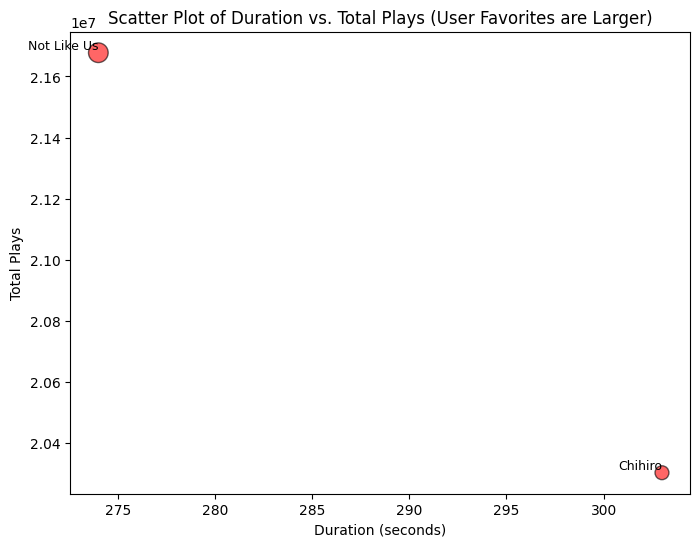

In [12]:
# Build Figure
plt.figure(figsize=(8, 6))

# Make size dependent on user preference
song_data_pd['size'] = song_data_pd['ranking'].max() / song_data_pd['ranking'] * 100  

# Scatter plot using Matplotlib
plt.scatter(song_data_pd['duration_s'], song_data_pd['total_plays'], s=song_data_pd['size'], c='red', alpha=0.6, edgecolors="k")

# Add labels next to points
for i, row in song_data_pd.iterrows():
    plt.text(row['duration_s'], row['total_plays'], row['song_name'], fontsize=9, ha='right', va='bottom')

# Add labels and title
plt.xlabel("Duration (seconds)")
plt.ylabel("Total Plays")
plt.title("Scatter Plot of Duration vs. Total Plays (User Favorites are Larger)")

# Show the plot
plt.show()